In [1]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Load dataset 
df = pd.read_csv("case4_hr_kmeans_1000.csv")
df.head()

,YearsExperience,SkillsCount,ProjectsCompleted,Certifications
0,1,7,1,1
1,0,7,1,1
2,1,7,1,1
3,0,4,1,1
4,0,4,3,0


In [3]:
# Feature
X = df[["YearsExperience","SkillsCount","ProjectsCompleted","Certifications"]]

In [4]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

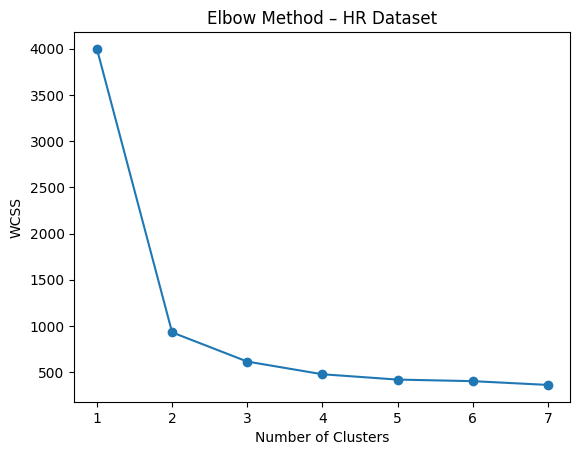

In [5]:
# Elbow Method
wcss = []

for i in range(1, 8):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 8), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method – HR Dataset")
plt.show()


In [6]:
# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

df.head()


,YearsExperience,SkillsCount,ProjectsCompleted,Certifications,Cluster
0,1,7,1,1,2
1,0,7,1,1,2
2,1,7,1,1,2
3,0,4,1,1,2
4,0,4,3,0,2


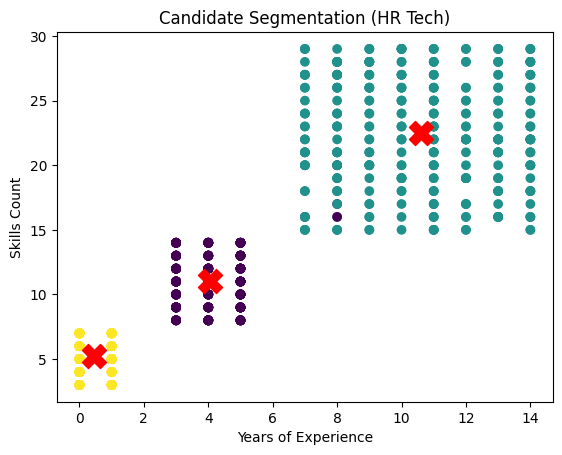

In [7]:
# Visualization
plt.scatter(
    df["YearsExperience"],
    df["SkillsCount"],
    c=df["Cluster"]
)

# Inverse transform centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(
    centroids[:, 0],   # YearsExperience
    centroids[:, 1],   # SkillsCount
    s=300,
    c='red',
    marker='X',
    label='Centroids'
)

plt.xlabel("Years of Experience")
plt.ylabel("Skills Count")
plt.title("Candidate Segmentation (HR Tech)")
plt.show()
